In [2]:
%matplotlib inline
%pylab inline

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import csv as csv
from sklearn.ensemble import RandomForestClassifier

Populating the interactive namespace from numpy and matplotlib


In [72]:
train_df = pd.read_csv('../data/train.csv', header=0)        # Load the train file into a dataframe
#print train_df

In [100]:
train_df.values

array([[1, 0, 3, ..., 7.25, nan, 3],
       [2, 1, 1, ..., 71.2833, 'C85', 0],
       [3, 1, 3, ..., 7.925, nan, 3],
       ..., 
       [889, 0, 3, ..., 23.45, nan, 3],
       [890, 1, 1, ..., 30.0, 'C148', 0],
       [891, 0, 3, ..., 7.75, nan, 2]], dtype=object)

In [73]:
train_df['Sex']=train_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [74]:
if len(train_df.Age[ train_df.Age.isnull() ]) > 0:
    train_df.loc[ (train_df.Age.isnull()), 'Age'] = -1

In [75]:
def alive(name,tmp):
    print name, " survived ", float(len(tmp.loc[(tmp.Survived==1)]))/float(len(tmp))*100., "% of ", len(tmp)

In [76]:
tmp = train_df.loc[(train_df.Cabin.isnull()==False)]
tmpnoclass = train_df.loc[(train_df.Cabin.isnull()==True)]
tmp2 = tmp.loc[(tmp.Survived==0)]
tmp3 = tmp.loc[(tmp.Survived==1)]
tmpA = tmp.loc[(tmp.Cabin.dropna().str.contains('A'))]
tmpB = tmp.loc[(tmp.Cabin.dropna().str.contains('B'))]
tmpC = tmp.loc[(tmp.Cabin.dropna().str.contains('C'))]
tmpD = tmp.loc[(tmp.Cabin.dropna().str.contains('D'))]
tmpE = tmp.loc[(tmp.Cabin.dropna().str.contains('E'))]
tmpF = tmp.loc[(tmp.Cabin.dropna().str.contains('F'))]
tmpG = tmp.loc[(tmp.Cabin.dropna().str.contains('G'))]

In [77]:
tmpclass1 = train_df.loc[(train_df.Pclass==1)]
tmpclass2 = train_df.loc[(train_df.Pclass==2)]
tmpclass3 = train_df.loc[(train_df.Pclass==3)]

alive("class 1",tmpclass1)
alive("class 2",tmpclass2)
alive("class 3",tmpclass3)

tmpclassbad = train_df.loc[(train_df.Cabin.isnull()==False)]
tmpclassbad2 = tmpclassbad.loc[(tmpclassbad.Pclass>1)]
alive("mark", tmpclassbad2)


class 1  survived  62.962962963 % of  216
class 2  survived  47.2826086957 % of  184
class 3  survived  24.2362525458 % of  491
mark  survived  67.8571428571 % of  28


In [78]:
alive("A",tmpA)
alive("B",tmpB)
alive("C",tmpC)
alive("D",tmpD)
alive("E",tmpE)
alive("F",tmpF)
alive("G",tmpG)
alive("w/ cabin",tmp)
alive("no cabin",tmpnoclass)

print tmpG[['Cabin','Pclass','Survived']]

A  survived  46.6666666667 % of  15
B  survived  74.4680851064 % of  47
C  survived  59.3220338983 % of  59
D  survived  75.7575757576 % of  33
E  survived  75.7575757576 % of  33
F  survived  61.5384615385 % of  13
G  survived  28.5714285714 % of  7
w/ cabin  survived  66.6666666667 % of  204
no cabin  survived  29.9854439592 % of  687
     Cabin  Pclass  Survived
10      G6       3         1
75   F G73       3         0
205     G6       3         0
251     G6       3         0
394     G6       3         1
699  F G63       3         0
715  F G73       3         0


In [80]:

#print tmp2[['Cabin','Pclass','Survived']]
#print tmp3[['Cabin','Pclass','Survived']]
#print tmpA[['Cabin','Pclass','Survived']]
##print tmpB[['Cabin','Pclass','Survived']]
#print tmpC[['Cabin','Pclass','Survived']]
#print tmpD[['Cabin','Pclass','Survived']]
#print tmpE[['Cabin','Pclass','Survived']]
#print tmpF[['Cabin','Pclass','Survived']]

23.7992929293


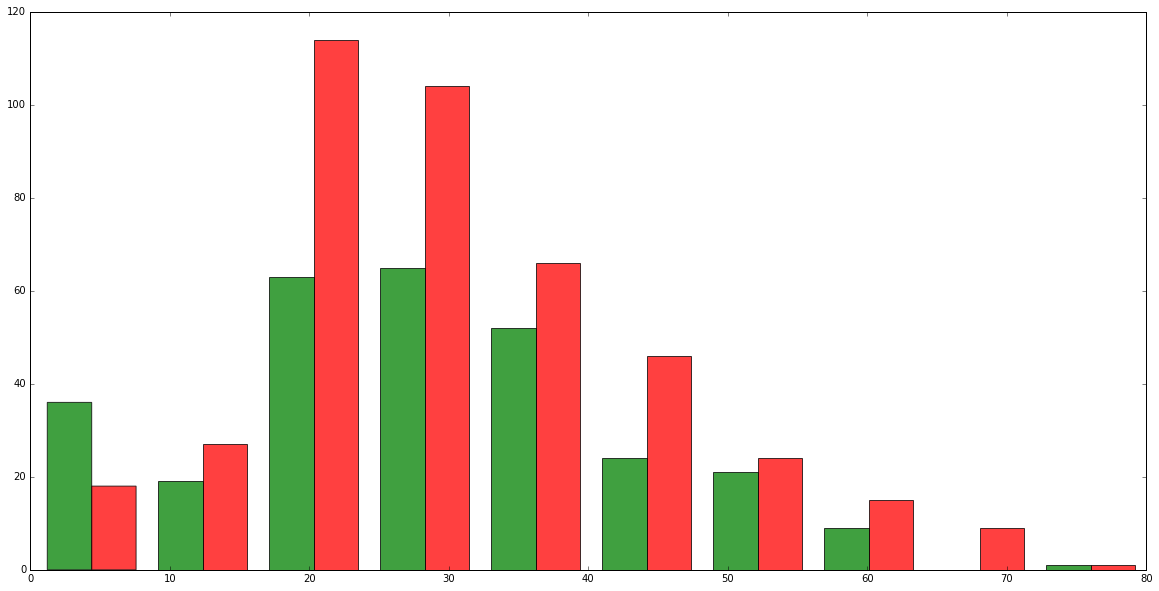

In [81]:
ids  = train_df['PassengerId']
age  = train_df['Age']
live = train_df['Survived']

print np.sum(age[age>0])/float(len(age))

agelive    = age*live
agenotlive = age*(1-live)

fig = figure(figsize=(20,10))
#plt.plot(ids,age)

n, bins, patches = plt.hist([agelive[agelive>0],agenotlive[agenotlive>0]], 10, color = ['g','r'],normed=0, alpha=0.75)

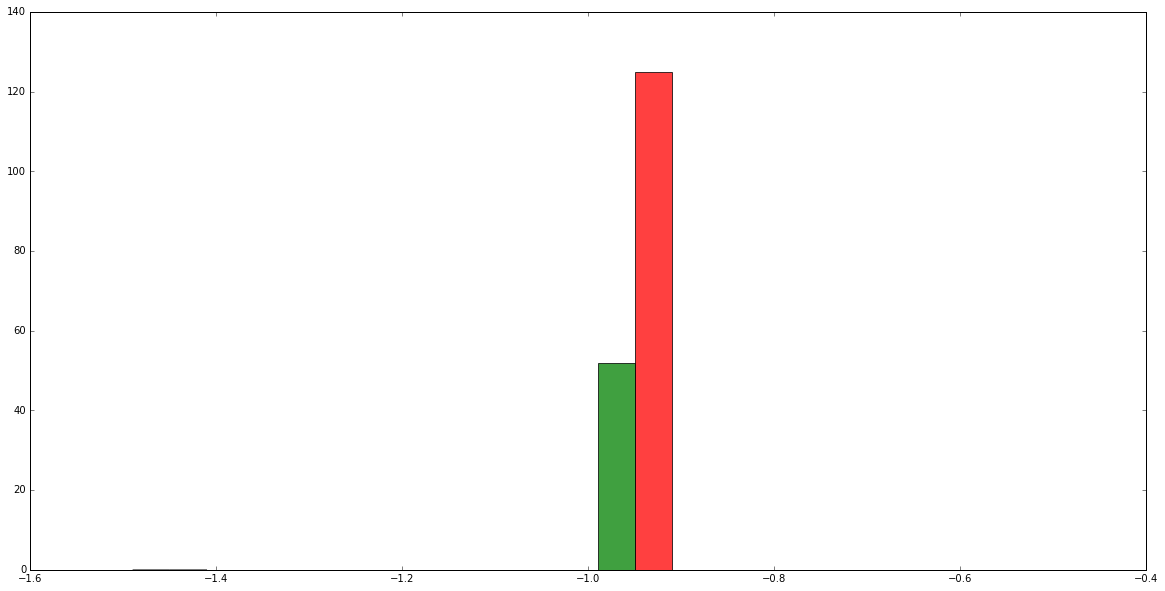

In [82]:
ids  = train_df['PassengerId']
age  = train_df['Age']
live = train_df['Survived']

agelive    = age*live
agenotlive = age*(1-live)

fig = figure(figsize=(20,10))
#plt.plot(ids,age)

n, bins, patches = plt.hist([agelive[agelive<0],agenotlive[agenotlive<0]], 10, color = ['g','r'],normed=0, alpha=0.75)

In [83]:
ids  = train_df['PassengerId']
sex  = train_df['Sex']
live = train_df['Survived']

print np.sum(sex[sex])/float(len(sex))

mlive    = sex*live
mnotlive = sex*(1-live)
flive    = (1-sex)*live
fnotlive = (1-sex)*(1-live)

print np.sum(flive)/float(len(sex[sex==0]))
print np.sum(fnotlive)/float(len(sex[sex==0]))
print np.sum(mlive)/float(len(sex[sex==1]))
print np.sum(mnotlive)/float(len(sex[sex==1]))

0.35241301908
0.742038216561
0.257961783439
0.188908145581
0.811091854419


Anzahl Frauen 314
Anzahl Frauen ueberlebt 233


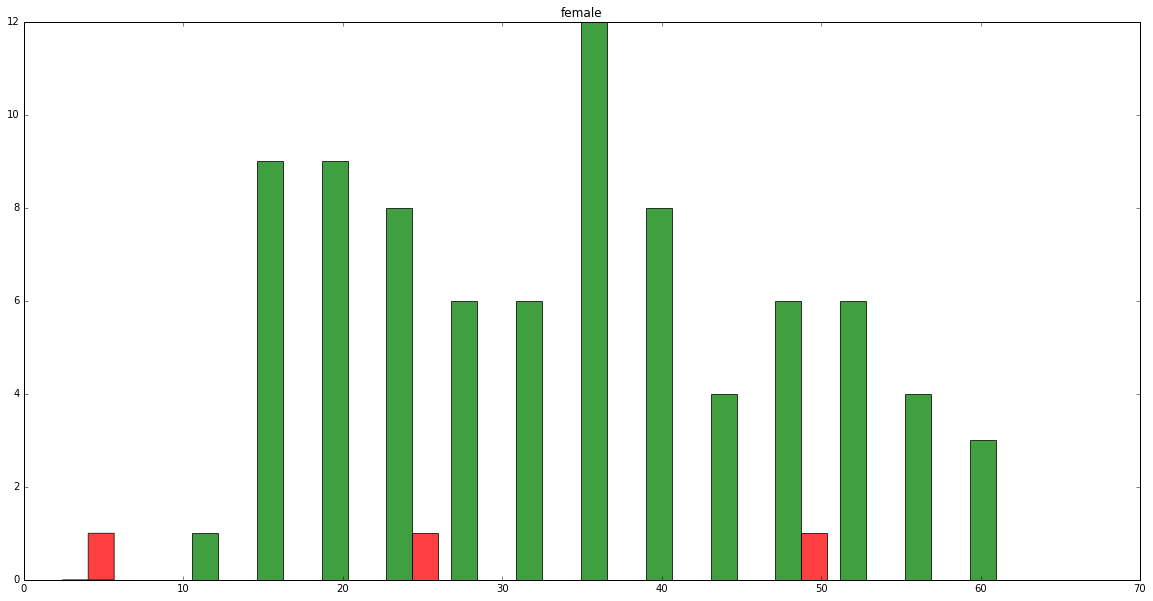

In [98]:
ids  = train_df['PassengerId']
age  = train_df['Age']
sex  = train_df['Sex']
live = train_df['Survived']
cls  = train_df['Pclass']

#print np.sum(age[age>0])/float(len(age))
print "Anzahl Frauen", len(sex)-np.sum(sex)
print "Anzahl Frauen ueberlebt", np.sum((1-sex)*live)

n_cls = 1
agelive    = age*live*(1-sex[cls==n_cls])
agenotlive = age*(1-live)*(1-sex[cls==n_cls])

fig = figure(figsize=(20,10))
#plt.plot(ids,age)
plt.title("female")

n, bins, patches = plt.hist([agelive[agelive>0],agenotlive[agenotlive>0]], 15, color = ['g','r'],normed=0, alpha=0.75)

23.7992929293


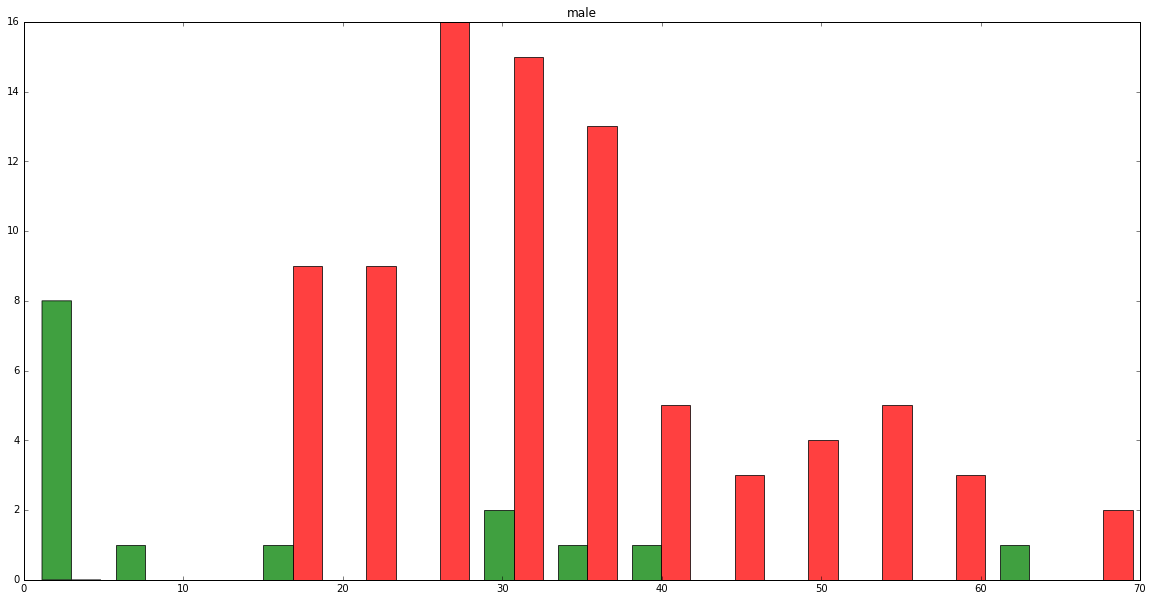

In [85]:
ids  = train_df['PassengerId']
age  = train_df['Age']
sex  = train_df['Sex']
cls  = train_df['Pclass']
live = train_df['Survived']

print np.sum(age[age>0])/float(len(age))

agelive    = age*live*(sex[cls==2])
agenotlive = age*(1-live)*(sex[cls==2])

fig = figure(figsize=(20,10))
#plt.plot(ids,age)
plt.title("male")
n, bins, patches = plt.hist([agelive[agelive>0],agenotlive[agenotlive>0]], 15, color = ['g','r'],normed=0, alpha=0.75)

im mittel ueberlebt 0.383838383838  von  891
Hafen (0, 'C') ueberlebt 0.553571428571  von  168
Hafen (1, 'N') ueberlebt 1.0  von  2
Hafen (2, 'Q') ueberlebt 0.38961038961  von  77
Hafen (3, 'S') ueberlebt 0.336956521739  von  644
0.139169472503
0.0594837261504


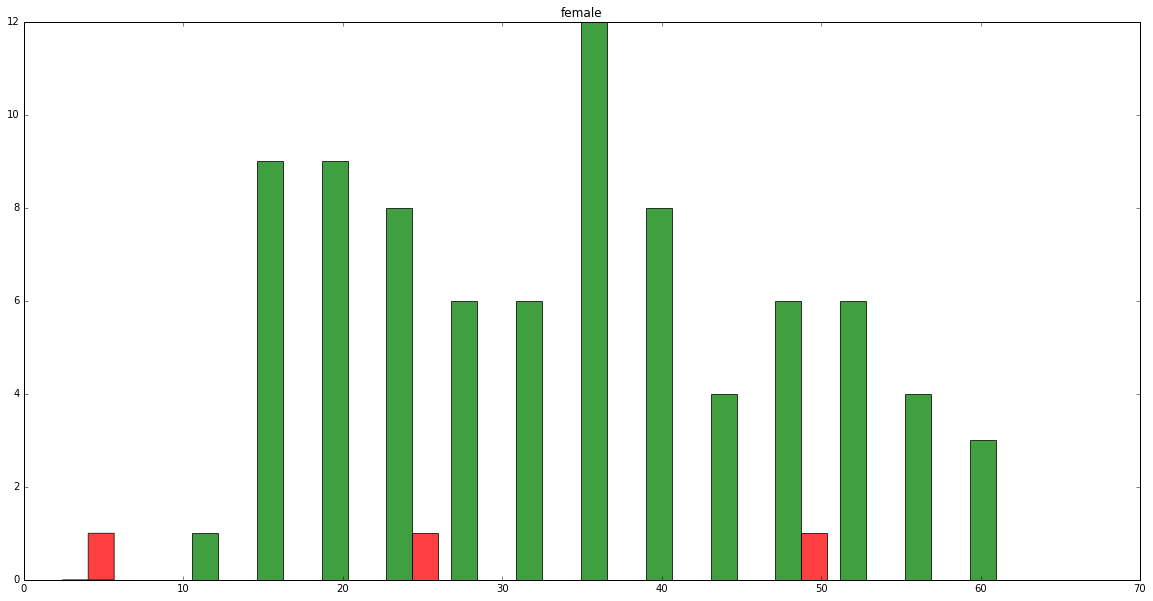

In [95]:
ids  = train_df['PassengerId']
age  = train_df['Age']
sex  = train_df['Sex']
live = train_df['Survived']
cls  = train_df['Pclass']
std  = train_df['Embarked']

print "im mittel ueberlebt", np.sum(live)/float(len(live)), " von ", len(live)
print "Hafen",Ports[0], "ueberlebt", np.sum(live[std==0])/float(np.sum([std==0])), " von ", np.sum([std==0])
print "Hafen",Ports[1], "ueberlebt", np.sum(live[std==1])/float(np.sum([std==1])), " von ", np.sum([std==1])
print "Hafen",Ports[2], "ueberlebt", np.sum(live[std==2])/float(np.sum([std==2])), " von ", np.sum([std==2])
print "Hafen",Ports[3], "ueberlebt", np.sum(live[std==3])/float(np.sum([std==3])), " von ", np.sum([std==3])

print np.sum(sex[age<0])/float(len(sex))

fsex = 1-sex
print np.sum(fsex[age<0])/float(len(sex))

n_cls = 1
agelive    = age*live*(1-sex[cls==n_cls])
agenotlive = age*(1-live)*(1-sex[cls==n_cls])

fig = figure(figsize=(20,10))
#plt.plot(ids,age)
plt.title("female")

n, bins, patches = plt.hist([agelive[agelive>0],agenotlive[agenotlive>0]], 15, color = ['g','r'],normed=0, alpha=0.75)

In [87]:
if len(train_df.Embarked[ train_df.Embarked.isnull() ]) > 0:
    train_df.Embarked[ train_df.Embarked.isnull() ] = 'N'

Ports = list(enumerate(np.unique(train_df['Embarked'])))    # determine all values of Embarked,
print Ports
Ports_dict = { name : i for i, name in Ports }              # set up a dictionary in the form  Ports : index
train_df.Embarked = train_df.Embarked.map( lambda x: Ports_dict[x]).astype(int)     # Convert all Embark strings to int

[(0, 'C'), (1, 'N'), (2, 'Q'), (3, 'S')]


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [ ]:
Ports = list(enumerate(np.unique(train_df['Embarked'])))    # determine all values of Embarked,
Ports_dict = { name : i for i, name in Ports }              # set up a dictionary in the form  Ports : index
train_df.Embarked = train_df.Embarked.map( lambda x: Ports_dict[x]).astype(int)     # Convert all Embark strings to int


In [ ]:
# All the ages with no data -> make the median of all Ages
median_age = train_df['Age'].dropna().median()
if len(train_df.Age[ train_df.Age.isnull() ]) > 0:
    train_df.loc[ (train_df.Age.isnull()), 'Age'] = median_age

In [ ]:
# Remove the Name column, Cabin, Ticket, and Sex (since I copied and filled it to Gender)
train_df = train_df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'PassengerId'], axis=1) 